In [1]:
using Flux
using Statistics
using Flux.Tracker, Statistics
using Flux.NNlib
using Flux: throttle, normalise
using Flux: binarycrossentropy
using Base.Iterators: repeated
using Flux: @epochs
#import Conda; Conda.update()

In [2]:
using DataFrames, CSV
using Plots 
using StatsPlots: @df, StatsPlots
#using Pkg
#Pkg.add("StatPlots")
#pyplot();


In [3]:
#data = CSV.read("ex2data1.txt");


file = "BostonHousing.csv"

data = DataFrame(CSV.File(file)) #|> DataFrame!
#df[:medv]
#
lstat = data[:lstat]
medv = data[:medv]

## Renaming columns of the dataset
## This is how we can rename columns of a DataFrame in Julia v1.0
#newnames = ["Score_1", "Score_2","Result"];
#names!(data, Symbol.(newnames));

In [4]:
#@df data scatter(:lstat,:medv, zcolor= :Result, xaxis = "Score in Test 1", yaxis="Score in Test 2", lab="Admit")

In [5]:
## Splitting the features i.e. scores in tests here (X) and the categories i.e. admit or reject here (Y)
#X = convert(Array,data[:,[:Score_1,:Score_2]]); #features
x = convert(Array,data[:lstat]); #features

y = convert(Array,data[:medv]);  #Y-values
## To see number of training samples
num_tr_ex = length(y); #99


In [22]:
X = (x .- mean(x, dims = 1)) ./ std(x, dims = 1)
W = param(zeros(1))

ω = Any[ 0.1*randn(size(lstat))]#, 0.0 ];
W =ω = ω[1] 

b = param([0.])
y;

In [7]:
size(X), size(y)

((506,), (506,))

In [8]:
predict(x) = NNlib.σ.(x*W .+ b)

predict (generic function with 1 method)

In [9]:
loss(x, y) = sum(binarycrossentropy.(predict(x), y))/num_tr_ex

loss (generic function with 1 method)

In [10]:
par = Params([W, b])
## Stocastic Gradient Descent with learning rate 0.01
opt = SGD(par, 0.1; decay = 0)


┌ Warning: SGD(params) is deprecated; use Descent(η::Float64) instead
│   caller = ip:0x0
└ @ Core :-1


#24 (generic function with 1 method)

In [11]:
#data = repeated((X, y), 200)
#Flux.train!(loss, par, zip(X, y), opt)#, cb = evalcb)
#evalcb() = @show(loss(x, y))

#tx, ty = (Xs[5], Ys[5])
#evalcb = () -> @show loss(tx, ty)
@epochs 100 Flux.train!(loss, zip(X, y), opt)# cb = evalcb)

┌ Info: Epoch 1
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Warning: train!(loss, data, opt) is deprecated; use train!(loss, params, data, opt) instead
│   caller = top-level scope at train.jl:106
└ @ Core /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:106
┌ Info: Epoch 2
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 3
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 4
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 5
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 6
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 7
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 8
└ @ Main /home/russell/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105
┌ Info: Epoch 9
└ @ Main /home/russell/.julia/pac

In [12]:

#=function contour_func_1(x,y)
    predict(hcat(x,y))
end
xs = collect(range(-2,stop=2,length=25))
ys = collect(range(-2,stop=2,length=25))
Z = [Tracker.data(contour_func_1(x,y)[1]) for x=xs, y=ys];
contour(xs,ys,Z, levels=1)
scatter!(X[:,1],X[:,2],zcolor = y, xaxis="Test1", yaxis="Test2")
=#

In [13]:
frame = stacktrace()[3]
frame.line

218

In [14]:
typeof(X)

Array{Float64,1}

In [15]:
X

506-element Array{Float64,1}:
 -1.0744989703439318  
 -0.49195252491856606 
 -1.2075324134098204  
 -1.3601707849275246  
 -1.025486649214394   
 -1.042290873601664   
 -0.03123670630090918 
  0.9097998593862199  
  2.4193793501759897  
  0.622727692770355   
  1.0918456235816467  
  0.08639286440998195 
  0.4280787602844755  
  ⋮                   
  0.13120412944270243 
  0.6927452943839807  
  1.1884699138084505  
  0.2026220830886006  
  0.037380543280444024
  0.34265728631585196 
  0.23483017983086849 
 -0.41773386720812294 
 -0.5003546371122012  
 -0.9820757362139461  
 -0.8644461655030548  
 -0.6683968809849029  

In [16]:
W

506-element Array{Float64,1}:
  0.14029469131587266  
  0.02098725186481533  
 -0.11487762527111166  
  0.06452112822290311  
 -0.10985355469369891  
  0.04316220812122689  
 -0.215696059025179    
 -0.009597462247880642 
  0.03398710845460342  
  0.004298798247974591 
  0.15448573250586495  
 -0.02259927513876679  
  0.06608463733683     
  ⋮                    
 -0.0014455600320768284
 -0.009045072137168438 
 -0.08303722923380805  
 -0.010695341805093394 
  0.09644823660502169  
 -0.02359503328812568  
  0.12229459199644128  
 -0.062346923520140145 
 -0.0842009404640007   
 -0.11253398186776153  
  0.17577942190946927  
 -0.0740828032703892   

In [17]:
b

Tracked 1-element Array{Float64,1}:
 0.0

In [18]:
plot_x = W.*X


506-element Array{Float64,1}:
 -0.15074650136362494   
 -0.010324731545997785  
  0.13871845609041444   
 -0.08775975361935559   
  0.11265335370713145   
 -0.044987575609250416  
  0.0067376344460330865 
 -0.008731769803586363  
  0.0822277083672593    
  0.002676980714646461  
  0.1686745709423336    
 -0.0019524161128273555 
  0.02828942962499935   
  ⋮                     
 -0.00018966344556580527
 -0.0062659311603870905 
 -0.0986872486703964    
 -0.0021671124358926173 
  0.003605287482736519  
 -0.008085010077041339  
  0.028718461030866997  
  0.02604442147059722   
  0.04213033101037113   
  0.11051689309186877   
 -0.15195184724398436   
  0.04951671464054631   

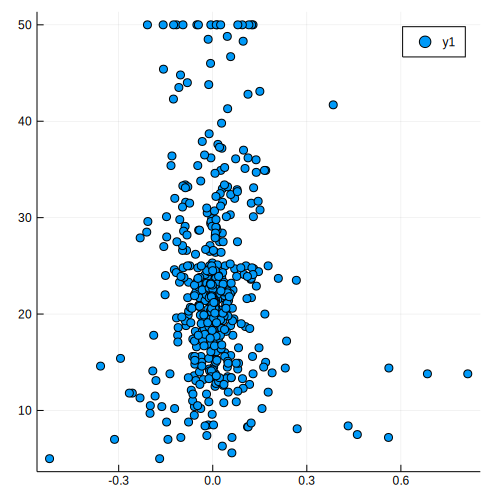

In [23]:

using StatsPlots
p1 = scatter(plot_x,y)
plot(p1, layout=(1,1), size=(500,500))
#plot(p1, layout=(1,2), size=(500,500))

In [20]:
p = predict(X) .> 0.5
sum(p .== y) / length(y)

MethodError: MethodError: no method matching *(::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  *(!Matched::LinearAlgebra.Adjoint{#s623,#s622} where #s622<:Union{DenseArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2}, ReinterpretArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray}, ReshapedArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2,A,MI} where MI<:Tuple{Vararg{SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray}, SubArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2,A,I,L} where L where I<:Tuple{Vararg{Union{Int64, AbstractRange{Int64}, AbstractCartesianIndex},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, DenseArray}} where #s623, ::Union{DenseArray{S,1}, ReinterpretArray{S,1,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray}, ReshapedArray{S,1,A,MI} where MI<:Tuple{Vararg{SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray}, SubArray{S,1,A,I,L} where L where I<:Tuple{Vararg{Union{Int64, AbstractRange{Int64}, AbstractCartesianIndex},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, DenseArray}}) where {T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64}, S} at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/matmul.jl:98
  *(!Matched::LinearAlgebra.Adjoint{#s623,#s622} where #s622<:LinearAlgebra.AbstractTriangular where #s623, ::AbstractArray{T,1} where T) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/triangular.jl:1805
  ...

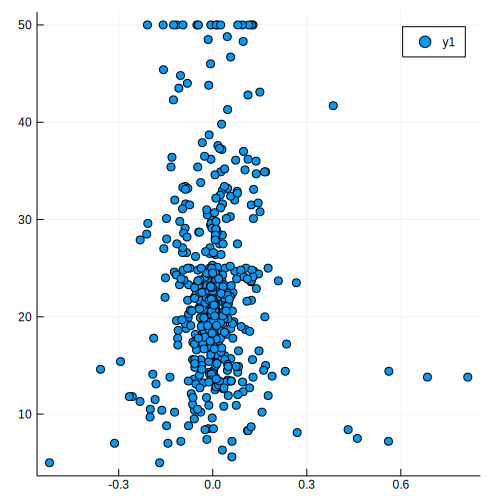

In [21]:

p2 = scatter(plot_x,y)
plot(p2, layout=(1,1), size=(500,500))